<a href="https://colab.research.google.com/github/bhanusupraja/Image-Classification-Using-CNN-with-MNIST-dataset/blob/imageClassification/MnistClassificationUsingCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# Import Libraries
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
import numpy as np
import tensorflow as tf
import tensorflow.keras.layers  as kl
import tensorflow.keras.models  as km
import matplotlib.pyplot as plt

In [2]:
## Dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
x_train, x_test = np.expand_dims(x_train, axis=-1), np.expand_dims(x_test, axis=-1)

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
## Model
inputs = kl.Input(shape=(28, 28, 1))
c = kl.Conv2D(32, (3, 3), padding="valid", activation=tf.nn.relu)(inputs)
m = kl.MaxPool2D((2, 2), (2, 2))(c)
d = kl.Dropout(0.5)(m)
c = kl.Conv2D(64, (3, 3), padding="valid", activation=tf.nn.relu)(d)
m = kl.MaxPool2D((2, 2), (2, 2))(c)
d = kl.Dropout(0.5)(m)
c = kl.Conv2D(128, (3, 3), padding="valid", activation=tf.nn.relu)(d)
f = kl.Flatten()(c)
outputs = kl.Dense(10, activation=tf.nn.softmax)(f)

In [11]:
model = km.Model(inputs, outputs)
model.summary()
model.compile(optimizer="adam",
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])




Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                      

In [16]:
# Callback to record loss and accuracy
class TrainingHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.train_losses = []
        self.val_losses = []
        self.train_accuracies = []
        self.val_accuracies = []

    def on_epoch_end(self, epoch, logs={}):
        self.train_losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.train_accuracies.append(logs.get('accuracy'))
        self.val_accuracies.append(logs.get('val_accuracy'))

history = TrainingHistory()

In [17]:
# Train the model with validation data
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), callbacks=[history])

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss: {0} - Test Acc: {1}".format(test_loss, test_acc))

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0315 - accuracy: 0.9894 - val_loss: 0.0234 - val_accuracy: 0.9928
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0324 - accuracy: 0.9896 - val_loss: 0.0218 - val_accuracy: 0.9935
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0296 - accuracy: 0.9904 - val_loss: 0.0240 - val_accuracy: 0.9930
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0307 - accuracy: 0.9904 - val_loss: 0.0250 - val_accuracy: 0.9919
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0203 - accuracy: 0.9939
Test Loss: 0.020263811573386192 - Test Acc: 0.9939000010490417


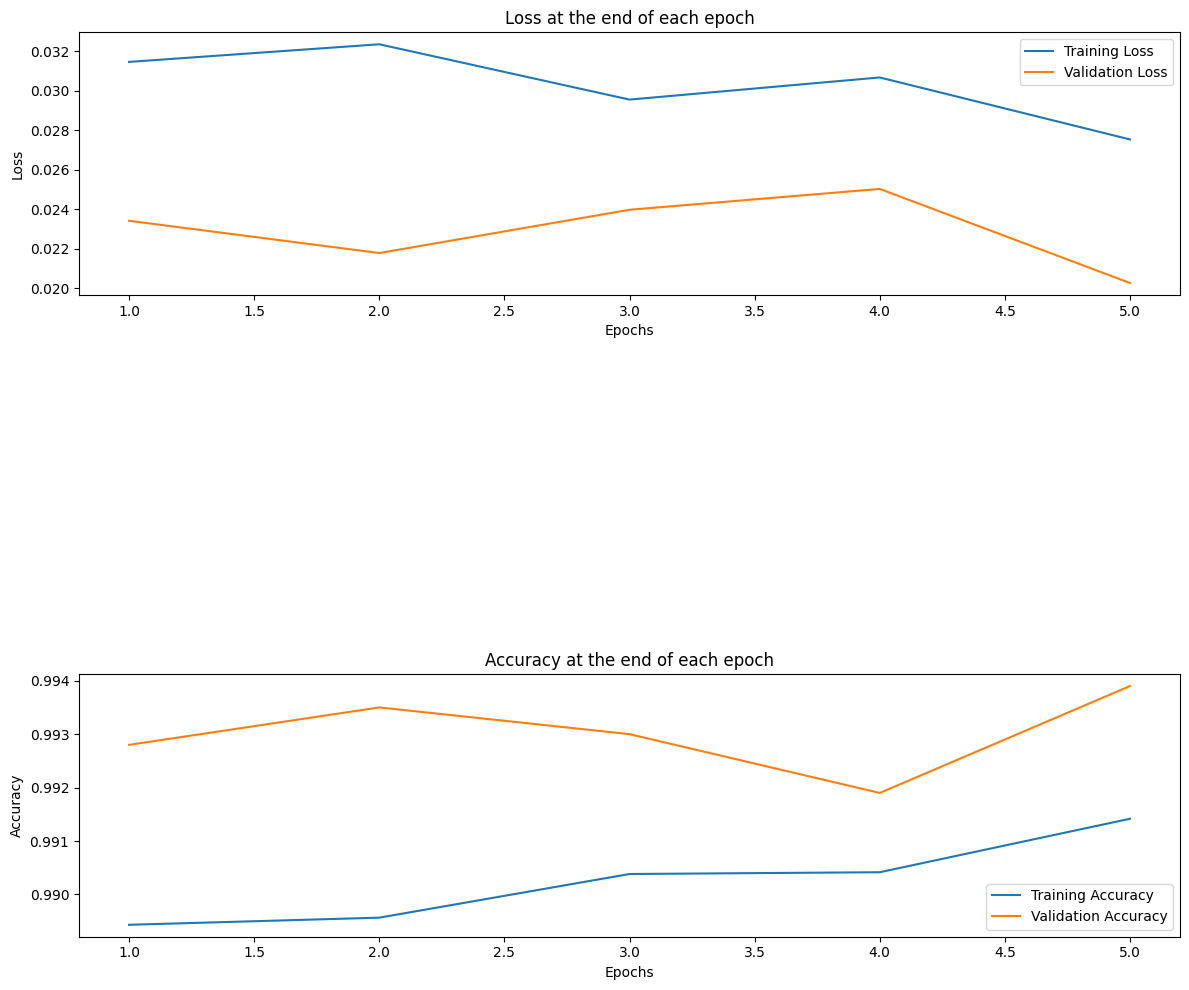

In [18]:
# Plot loss and accuracy
epochs = range(1, len(history.train_losses) + 1)
plt.figure(figsize=(12, 10))

plt.subplot(3, 1, 1)
plt.plot(epochs, history.train_losses, label='Training Loss')
plt.plot(epochs, history.val_losses, label='Validation Loss')
plt.title('Loss at the end of each epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(epochs, history.train_accuracies, label='Training Accuracy')
plt.plot(epochs, history.val_accuracies, label='Validation Accuracy')
plt.title('Accuracy at the end of each epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


1/1 [==============================] - 0s 23ms/step


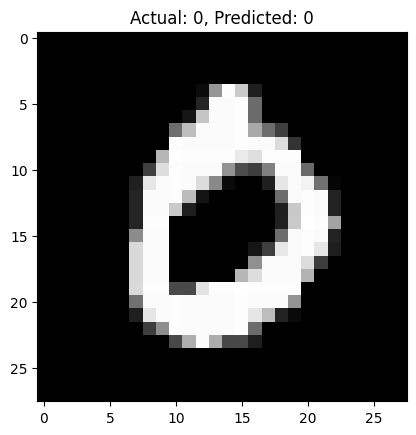

In [21]:
# Test a sample example from the test set
sample_index = 3
sample_image = x_test[sample_index]
sample_label = y_test[sample_index]

prediction = model.predict(np.expand_dims(sample_image, axis=0))
predicted_label = np.argmax(prediction)

plt.figure()
plt.imshow(sample_image.squeeze(), cmap='gray')
plt.title(f'Actual: {sample_label}, Predicted: {predicted_label}')
plt.show()